In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# 顯示圖片
def imgshow(img):
    cv2.imshow('My Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
# Histogram Equalization
def HE(img):
    [img_his, img_bin] = np.histogram(img.flatten(), range(257))
    img_cdf = np.cumsum(img_his) 
    img_m_cdf = np.ma.masked_equal(img_cdf, 0)  #除去直方圖中的0值
    img_cdf_tr = (img_m_cdf - img_m_cdf.min())*255 / (img_m_cdf.max()-img_m_cdf.min())
    img_rv = np.ma.filled(img_cdf_tr, 0).astype('uint8')  #補回0
    img_HE = img_rv[img]
    [img_HE_his, img_HE_bin] = np.histogram(img_HE.flatten(), range(257))
    
    plt.subplot(3, 1 ,1)  #1列2行，編號1
    plt.bar(range(256), img_his, color = 'lightblue')  #原始圖片長條圖
    plt.title('Original image')
    
    plt.subplot(3, 1 ,3)  #1列2行，編號2
    plt.bar(range(256), img_HE_his, color = 'red')  #圖片HE後長條圖
    plt.title("HE's image")
    
    plt.savefig("HE.jpg")
    
    return img_HE

In [4]:
# 讀取圖檔
img = cv2.imread('image.jpg')
n = np.shape(img)[0]  #列
m = np.shape(img)[1]  #行

# 轉為灰階
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

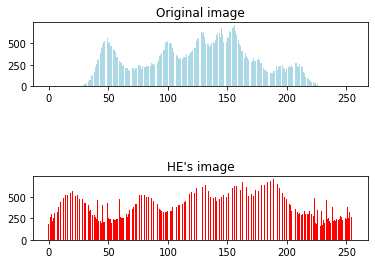

In [5]:
# 灰階HE
gray_HE = HE(gray)
imgshow(gray_HE)

In [6]:
# 彩圖HE:分別對R,G,B做HE
[R, G, B] = cv2.split(img)

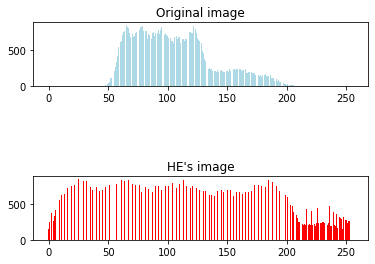

In [7]:
HE_R = HE(R)

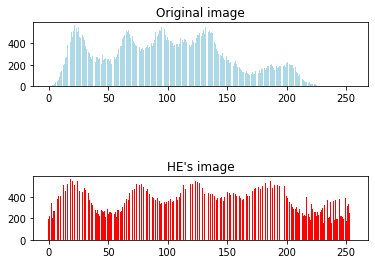

In [8]:
HE_G = HE(G)

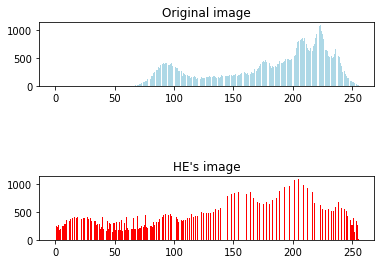

In [9]:
HE_B = HE(B)

In [10]:
img_HE = cv2.merge([HE_R, HE_G, HE_B])
imgshow(img_HE)

In [11]:
# 彩圖HE:老師給的公式
img = np.double(img)
[R, G, B] = cv2.split(img)
R_HE = R*gray_HE/gray
G_HE = G*gray_HE/gray
B_HE = B*gray_HE/gray
img_HE_tr = np.uint8(cv2.merge([R_HE, G_HE, B_HE]))
imgshow(img_HE_tr)

In [12]:
cv2.imwrite('input_image.jpg', img)
cv2.imwrite('gray_image.jpg', gray)
cv2.imwrite('input_image_HE.jpg', img_HE)
cv2.imwrite('gray_image_HE.jpg', gray_HE)
cv2.imwrite('input_image_HE_tr.jpg', img_HE_tr)

True

In [13]:
%save 廖家緯.HW4.py 1-12

File `廖家緯.HW4.py` exists. Overwrite (y/[N])?  y
The following commands were written to file `廖家緯.HW4.py`:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# 顯示圖片
def imgshow(img):
    cv2.imshow('My Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
# Histogram Equalization
def HE(img):
    [img_his, img_bin] = np.histogram(img.flatten(), range(257))
    img_cdf = np.cumsum(img_his) 
    img_m_cdf = np.ma.masked_equal(img_cdf, 0)  #除去直方圖中的0值
    img_cdf_tr = (img_m_cdf - img_m_cdf.min())*255 / (img_m_cdf.max()-img_m_cdf.min())
    img_rv = np.ma.filled(img_cdf_tr, 0).astype('uint8')  #補回0
    img_HE = img_rv[img]
    [img_HE_his, img_HE_bin] = np.histogram(img_HE.flatten(), range(257))
    
    plt.subplot(3, 1 ,1)  #1列2行，編號1
    plt.bar(range(256), img_his, color = 'lightblue')  #原始圖片長條圖
    plt.title('Original image')
    
    plt.subplot(3, 1 ,3)  #1列2行，編號2
    plt.bar(range(256), img_HE_his, color = 'red')  #圖片HE後長條圖
    plt.title("HE's image")
    
    plt.sa